## EDA and Machine Learning model to predict higgs boson events by a binary classification (Data from

In [27]:
!pip3 install xgboost lightgbm catboost optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00


In [3]:
from google.colab import files
import zipfile

In [4]:
data = files.upload()

Saving higgs-boson.zip to higgs-boson (1).zip


In [5]:
with zipfile.ZipFile('/content/higgs-boson.zip','r') as zip_data :
  zip_data.extractall('/content/')

In [6]:
def extract_files_zip(path_zip,path_extract):
  with zipfile.ZipFile(path_zip,'r') as zip_data :
    zip_data.extractall(path_extract)

In [7]:
files_path = ["/content/training.zip","/content/test.zip"]

In [8]:
for i in files_path:
  extract_files_zip(i,"/content/")

In [9]:
#Data cleaning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Model preprocessing
from sklearn.model_selection import train_test_split

In [28]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Import lib
import lightgbm as lgb
import xgboost as xgb

In [12]:
#Loading dataframes
df_train = pd.read_csv("/content/training.csv")
df_test = pd.read_csv("/content/test.csv")

In [13]:
print(f"df_train shape : {df_train.shape}")
print(f"df_test shape : {df_test.shape}")

df_train shape : (250000, 33)
df_test shape : (550000, 31)


In [14]:
mapping = {
    "b":0, #non-higgs event
    "s":1  #higgs event
}
df_train["Label"] = df_train["Label"].map(mapping)

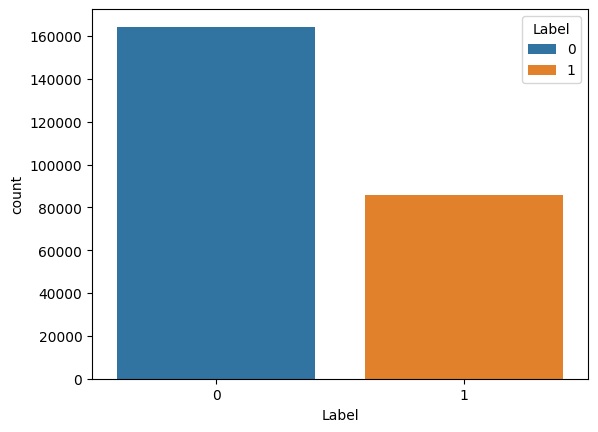

In [15]:
sns.countplot(data=df_train,x="Label",hue="Label")
plt.show()

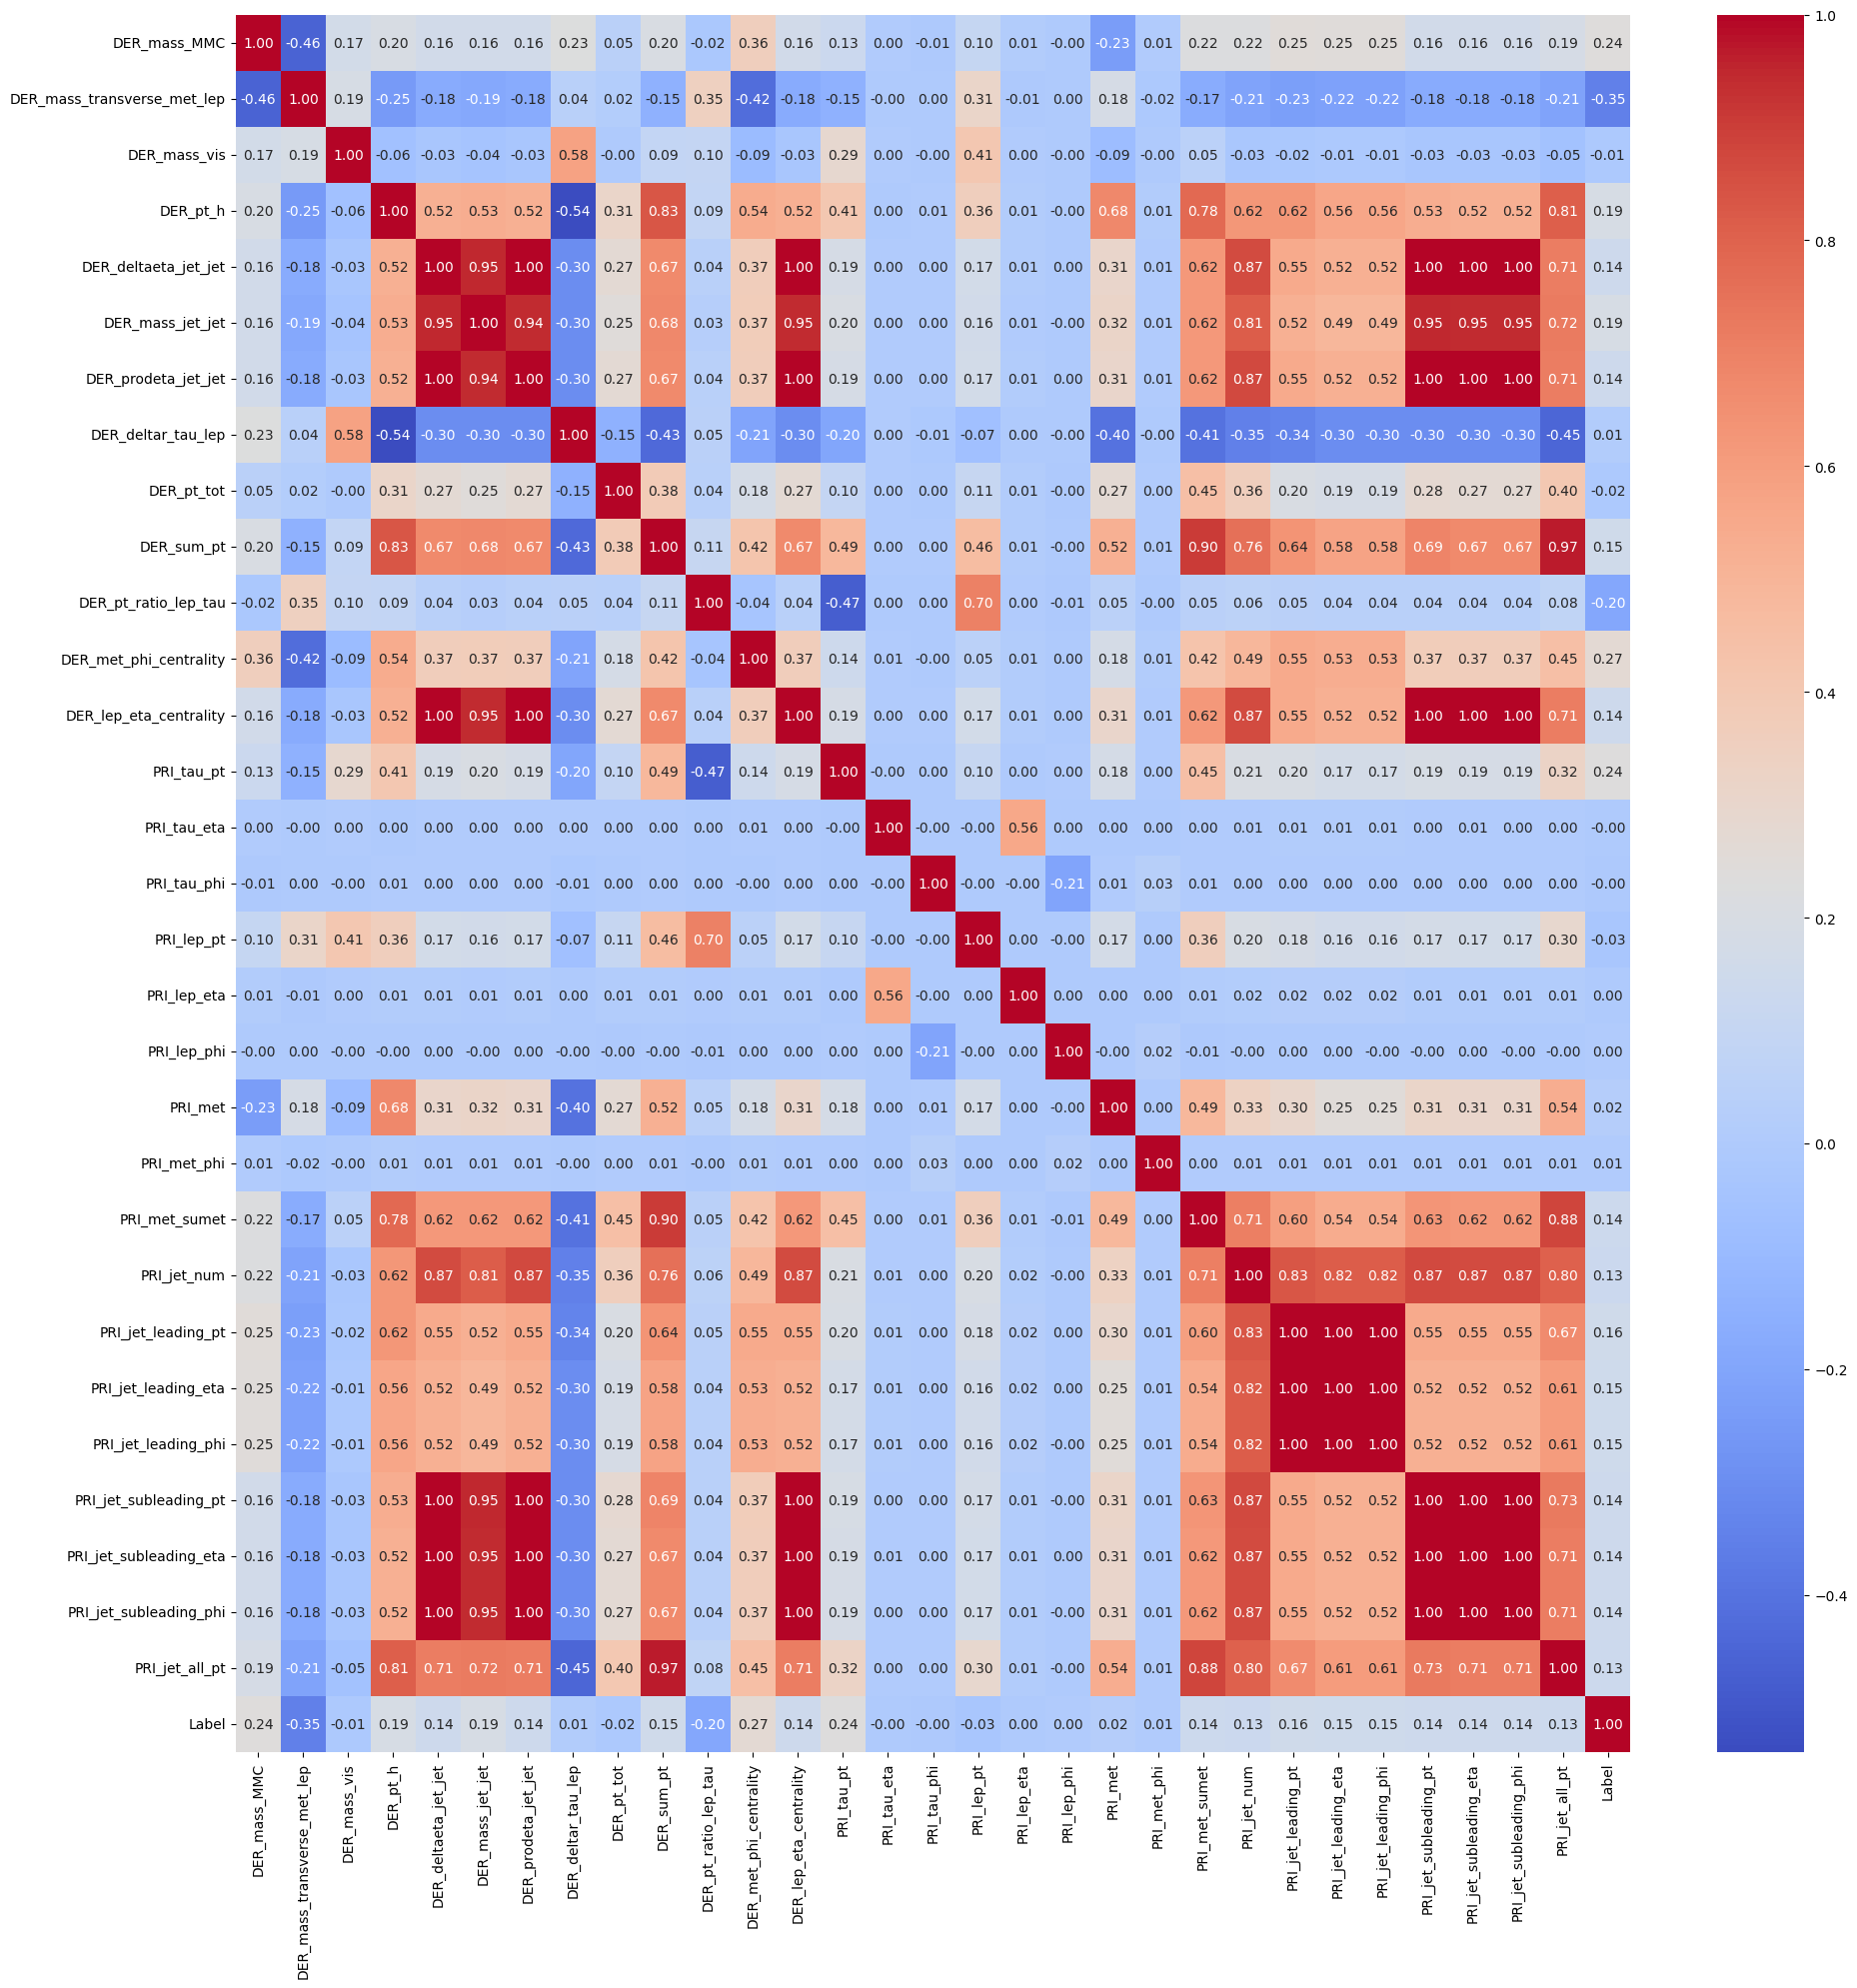

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.drop(columns=["Weight","EventId"]).corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.tight_layout()
plt.show()

## Missing values from the df_train & df_test

In [17]:
df_test.replace(-999.0,np.nan,inplace=True)
missing_values_test = df_test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print(f"Missing values in df_test {missing_values_test.sort_values(ascending=False)}")

Missing values in df_test DER_deltaeta_jet_jet      389872
DER_mass_jet_jet          389872
DER_prodeta_jet_jet       389872
PRI_jet_subleading_phi    389872
DER_lep_eta_centrality    389872
PRI_jet_subleading_eta    389872
PRI_jet_subleading_pt     389872
PRI_jet_leading_eta       220156
PRI_jet_leading_pt        220156
PRI_jet_leading_phi       220156
DER_mass_MMC               83822
dtype: int64


In [18]:
df_train.replace(-999.0,np.nan,inplace=True)
missing_values_train = df_train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print(f"Missing values in df_train {missing_values_train.sort_values(ascending=False)}")

Missing values in df_train DER_deltaeta_jet_jet      177457
DER_mass_jet_jet          177457
DER_prodeta_jet_jet       177457
PRI_jet_subleading_phi    177457
DER_lep_eta_centrality    177457
PRI_jet_subleading_eta    177457
PRI_jet_subleading_pt     177457
PRI_jet_leading_eta        99913
PRI_jet_leading_pt         99913
PRI_jet_leading_phi        99913
DER_mass_MMC               38114
dtype: int64


## Features engineering for treating missing values

In [ ]:
#Features engineering

df_train["pt_ratio_tau_lep"] = 1

<Axes: xlabel='Label', ylabel='DER_mass_MMC'>

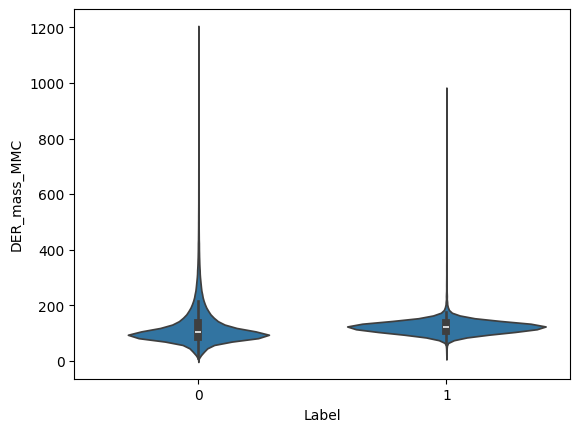

In [20]:
sns.violinplot(data=df_train,x="Label",y="DER_mass_MMC")

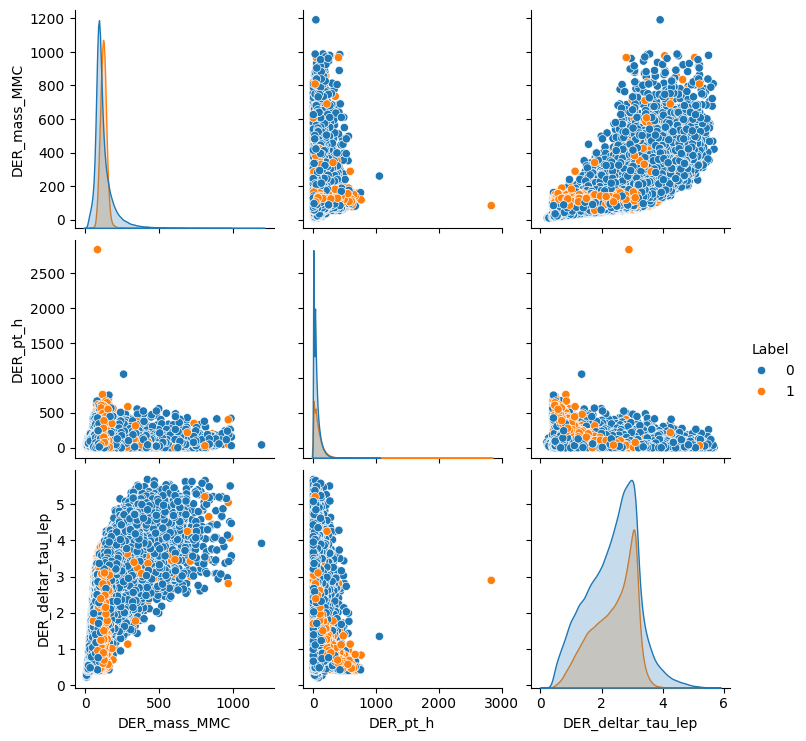

In [21]:
sns.pairplot(df_train[['DER_mass_MMC','DER_pt_h','DER_deltar_tau_lep','Label']],hue="Label")

In [29]:
#Feature split (Train data)

features = [col for col in df_train.columns if col not in ["Weight","EventId","Label"]]

X = df_train[features]
y = df_train["Label"]

print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

#Feature split (Test)

X_test = df_test[features]

print(f"X_test shape : {X_test.shape}")

X shape : (250000, 30)
y shape : (250000,)
X_test shape : (550000, 30)


## Machine learning models training

In [23]:
#Models training (**Only tree models**)

models = {

}